In [1]:
%%bash
head 'mpd.v1/data/mpd.slice.4000-4999.json'

Couldn't find program: 'bash'


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense

import matplotlib
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

import re
import requests
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)


Using TensorFlow backend.


In [3]:
df= pd.read_csv("C:/Users/Dell/Downloads/datascience/spotifyRecommendationsystem/merged_final.csv")

In [4]:
df.head()

,Unnamed: 0,album_id,album_name,year_released,album_release_date,track_artist_ids,track_id,track_duration_ms,track_explicit,track_name,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,audio_features_id,artist1_id,followers,artist_popularity,artist_genre1,artist_genre2,artist_genre3,album_label,album_popularity,in_playlist
0,3325,671JMBwDOqsTqgUQ1uV31Q,Album for the Young: Gentle Piano by Tchaikovs...,5,3/29/2014,['4tSF3kfKHwrJHGS7B4UPoK'],0deYxSSsBtn2F4Al1Sj5by,71523,False,"Album for the Young, Op. 68 ""Album für die Jug...",0,0.719,0.0579,7.0,-14.153,1.0,0.3310,0.996,0.922,0.1010,0.724,74.162,0deYxSSsBtn2F4Al1Sj5by,4tSF3kfKHwrJHGS7B4UPoK,139.0,19.0,NaN,NaN,NaN,2014 Ameritz Music Ltd.,0.0,1
1,3300,3CyG8owv9bw92gJ3mJzobY,Asian Zen Spa,5,4/21/2014,['2owwKPwj60GOqmAPowOqmK'],3YeBvTccOklQoM4vqDzyOq,310125,False,Backroads,9,0.316,0.0161,9.0,-31.928,0.0,0.0790,0.996,0.934,0.1250,0.148,180.081,3YeBvTccOklQoM4vqDzyOq,6FarM6zyPwNuuVw7lTbMlt,270.0,23.0,NaN,NaN,NaN,Ocean And Air Records,21.0,1
2,2314,1maoQPAmw44bbkNOxKlwsx,Drukqs,5,10/22/2001,['6kBDZFXuLrZgHnvmPu9NsG'],2MZSXhq4XDJWu6coGoXX1V,125520,False,Avril 14th,68,0.558,0.0259,8.0,-30.016,1.0,0.0458,0.996,0.871,0.0969,0.370,157.811,2MZSXhq4XDJWu6coGoXX1V,6kBDZFXuLrZgHnvmPu9NsG,364225.0,61.0,acid techno,ambient,electronic,Warp Records,62.0,1
3,3338,4GFWY45h3wGQlXXQEr5Std,Happy Newage Piano Collection Vol.1,5,10/31/2013,['0BeIulKOpcvsabwlt4u8qp'],0ndWuoSddVBgoouqnN1dhI,254590,False,가질 수 없어도 행복한게 사랑이다,7,0.586,0.1410,9.0,-21.364,1.0,0.0725,0.996,0.937,0.1030,0.378,72.792,0ndWuoSddVBgoouqnN1dhI,75iUxGnPfWc4gpqs6EzxrM,1591.0,16.0,NaN,NaN,NaN,Hot Ideas,2.0,1
4,1652,21zVmZS6xxjGTAs6bFLUg4,Undertale - Fragments of a Heart,5,2/22/2016,['2K1Ps7vnKg2AnKsSoVqH4P'],1lnbubvX7XVgbBqHKg5C9G,88700,False,His Theme (feat. Doug Perry),26,0.548,0.0138,3.0,-31.846,1.0,0.0355,0.996,0.850,0.1050,0.207,75.955,1lnbubvX7XVgbBqHKg5C9G,2K1Ps7vnKg2AnKsSoVqH4P,2112.0,37.0,otacore,scorecore,NaN,Various Artists,33.0,1


In [5]:
import re
bad_indices=[]
lst_4_years=[]
lst_2_slash=[]
lst_2_hyphen=[]
lst_year_release=[]
for i,date in enumerate(df.album_release_date):
    if len(date)==4:
        lst_4_years.append(date)
        lst_year_release.append(date)
    elif re.findall(r"(.){1,2}[/](.){1,2}[/](.){1,2}",date):
        lst_2_slash.append(date)
        if int(date[-2:]) < 19:
            lst_year_release.append("20"+(date[-2:]))
        else:
            lst_year_release.append("19"+(date[-2:]))
    elif re.findall(r"(.){4}-(.){2}",date):
            lst_2_hyphen.append(date)
            lst_year_release.append(date[:4])
            
    else:
        bad_indices.append((i, date))
print(len(bad_indices))
df["release_year"]=lst_year_release
    

0


In [6]:
print(sorted(set(lst_year_release)))

['1939', '1942', '1945', '1947', '1948', '1949', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [7]:
# drop non-quant and garbage columns
X_database = df.drop(['Unnamed: 0','album_id', 'album_name', 'album_release_date', 'track_artist_ids', 'track_id', 'track_name', 'audio_features_id', 'artist1_id', 'artist_genre1', 'artist_genre2', 'artist_genre3', 'album_label','year_released'], axis=1)
X_database.shape

(32054, 19)

In [8]:
X_database.head()

,track_duration_ms,track_explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,artist_popularity,album_popularity,in_playlist,release_year
0,71523,False,0,0.719,0.0579,7.0,-14.153,1.0,0.3310,0.996,0.922,0.1010,0.724,74.162,139.0,19.0,0.0,1,2014
1,310125,False,9,0.316,0.0161,9.0,-31.928,0.0,0.0790,0.996,0.934,0.1250,0.148,180.081,270.0,23.0,21.0,1,2014
2,125520,False,68,0.558,0.0259,8.0,-30.016,1.0,0.0458,0.996,0.871,0.0969,0.370,157.811,364225.0,61.0,62.0,1,2001
3,254590,False,7,0.586,0.1410,9.0,-21.364,1.0,0.0725,0.996,0.937,0.1030,0.378,72.792,1591.0,16.0,2.0,1,2013
4,88700,False,26,0.548,0.0138,3.0,-31.846,1.0,0.0355,0.996,0.850,0.1050,0.207,75.955,2112.0,37.0,33.0,1,2016


In [9]:
df.isnull().sum()

Unnamed: 0               0
album_id                 0
album_name               2
year_released            0
album_release_date       0
track_artist_ids         0
track_id                 0
track_duration_ms        0
track_explicit           0
track_name               2
track_popularity         0
danceability             3
energy                   3
key                      3
loudness                 3
mode                     3
speechiness              3
acousticness             3
instrumentalness         3
liveness                 3
valence                  3
tempo                    3
audio_features_id        3
artist1_id               1
followers                1
artist_popularity        1
artist_genre1         1901
artist_genre2         5110
artist_genre3         8139
album_label             10
album_popularity         3
in_playlist              0
release_year             0
dtype: int64

In [10]:
df.nunique()

Unnamed: 0             4002
album_id              11390
album_name            10749
year_released             4
album_release_date     3321
track_artist_ids       8618
track_id              19167
track_duration_ms     13858
track_explicit            2
track_name            17302
track_popularity         93
danceability            862
energy                 1126
key                      12
loudness               9394
mode                      2
speechiness            1278
acousticness           3410
instrumentalness       4211
liveness               1559
valence                1326
tempo                 14945
audio_features_id     19164
artist1_id             5933
followers             18367
artist_popularity        97
artist_genre1           593
artist_genre2           567
artist_genre3           476
album_label            3638
album_popularity         93
in_playlist               2
release_year             74
dtype: int64

In [11]:
X_database=X_database.dropna(axis=0)
X_database.shape

(32051, 19)

In [12]:
X_database_main = X_database.copy() 

# delete binary values which will not be standardized
del X_database["track_explicit"]
del X_database["mode"]
del X_database["in_playlist"]
# standardize all quantitative columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_database)
X_database_scaled = scaler.transform(X_database)
X_database_scaled = pd.DataFrame(X_database_scaled)
X_database_scaled.columns = X_database.columns

# add back binary columns
X_database_scaled["track_explicit"] = X_database_main["track_explicit"]
X_database_scaled["mode"] = X_database_main["mode"]
X_database_scaled["in_playlist"] = X_database_main["in_playlist"]

In [13]:
X_database_scaled.head()

,track_duration_ms,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,artist_popularity,album_popularity,release_year,track_explicit,mode,in_playlist
0,-2.381157,-2.358229,0.712777,-2.801331,0.508743,-1.908517,2.055703,2.673083,4.147056,-0.558762,0.972975,-1.670090,-0.555003,-2.566291,-2.596184,0.508457,False,1.0,1
1,1.133484,-1.909557,-1.781186,-3.000556,1.065624,-6.857963,-0.155880,2.673083,4.205263,-0.408516,-1.402183,2.033079,-0.554974,-2.339242,-1.528684,0.508457,False,0.0,1
2,-1.585774,1.031731,-0.283571,-2.953848,0.787183,-6.325566,-0.447248,2.673083,3.899677,-0.584429,-0.486758,1.254469,-0.475669,-0.182280,0.555484,-0.633201,False,1.0,1
3,0.315446,-2.009262,-0.110293,-2.405265,1.065624,-3.916419,-0.212925,2.673083,4.219815,-0.546241,-0.453769,-1.717988,-0.554686,-2.736577,-2.494518,0.420637,False,1.0,1
4,-2.128138,-1.062068,-0.345456,-3.011518,-0.605017,-6.835130,-0.537642,2.673083,3.797815,-0.533721,-1.158894,-1.607402,-0.554573,-1.544572,-0.918683,0.684096,False,1.0,1


import seaborn as sns

In [14]:
import seaborn as sns

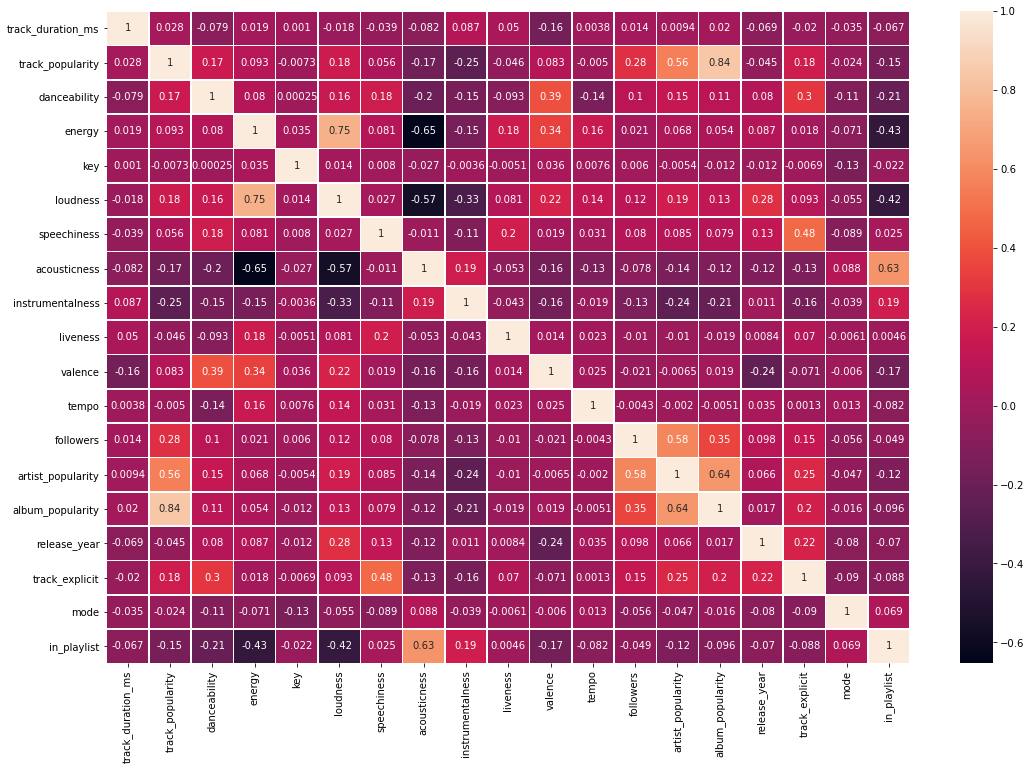

In [15]:
plt.subplots(figsize=(18,12))
corr=X_database_scaled.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, linewidths=.5,annot=True)

In [16]:
del X_database_scaled['energy']
del X_database_scaled['album_popularity']

In [17]:
helen_links = ['https://open.spotify.com/track/6OG1S805gIrH5nAQbEOPY3',
'https://open.spotify.com/track/0SGkqnVQo9KPytSri1H6cF',
'https://open.spotify.com/track/3Bp478Itxv8gxqqEcf8HRL',
'https://open.spotify.com/track/7iaw359G2XT14uTfV9feip',
'https://open.spotify.com/track/5qmZHOqnuKopAfKv8W61oN',
'https://open.spotify.com/track/3lBRNqXjPp2j3JMTCXDTNO',
'https://open.spotify.com/track/4uQ7wYsuL0DryknoDc11Hk',
'https://open.spotify.com/track/16qYlQ6koFxYVbiJbGHblz',
'https://open.spotify.com/track/4y5Cc7AOL8CIdtLWdcuGMg',
'https://open.spotify.com/track/7DDRPKLKFIvDbNSQmnz19Y',
'https://open.spotify.com/track/6fZersDfjZ7CMyLe0jvixb',
'https://open.spotify.com/track/22eADXu8DfOAUEDw4vU8qy',
'https://open.spotify.com/track/0lAveUGBd27UoLnhbnSzgG',
'https://open.spotify.com/track/0jn2XqaHliEpWd04ZykIHy',
'https://open.spotify.com/track/6Z8R6UsFuGXGtiIxiD8ISb',
'https://open.spotify.com/track/1XGwjdHXHNu3842f75eg3T',
'https://open.spotify.com/track/6EpRaXYhGOB3fj4V2uDkMJ',
'https://open.spotify.com/track/2lH6RlA7NA2CcTfyEsONTc',
'https://open.spotify.com/track/1SayqEg8HKK2IeIEWjdYxY',
'https://open.spotify.com/track/2fQrGHiQOvpL9UgPvtYy6G']

dhruv_links = ['https://open.spotify.com/track/5xS9hkTGfxqXyxX6wWWTt4',
'https://open.spotify.com/track/56ZDcszhe1eCeghso93fXP',
'https://open.spotify.com/track/60geMByGdlcGGMR5R5ZjHE',
'https://open.spotify.com/track/4gHSezW5CHZCvjAUjF2pd5',
'https://open.spotify.com/track/2eW8aJXH9OSqJuw1UcPEj6',
'https://open.spotify.com/track/2IO7yf562c1zLzpanal1DT',
'https://open.spotify.com/track/2SJMm1mWgcy3pj2gMfwRiQ',
'https://open.spotify.com/track/4Sfa7hdVkqlM8UW5LsSY3F',
'https://open.spotify.com/track/4JuZQeSRYJfLCqBgBIxxrR',
'https://open.spotify.com/track/5ybydtBlJJL82AprlvN7Lg',
'https://open.spotify.com/track/5R0b6aGJH9J6BW4eNUgYDd',
'https://open.spotify.com/track/6Yzh272O4hwZHjrnXYhL8a',
'https://open.spotify.com/track/1UE2mIj6uy9Tip2cvQx5xu',
'https://open.spotify.com/track/79nEEoEPY2w8EXj9hjn5oc',
'https://open.spotify.com/track/3JDNTieVelwwVvIIpPqAH3',
'https://open.spotify.com/track/26nxjX1zXkT8oVwO9RPUMf',
'https://open.spotify.com/track/4qdgv45EPcQqpQ08tF34f8',
'https://open.spotify.com/track/2pA4ip3VIEVcIa3qE02oAX',
'https://open.spotify.com/track/1KDYN3odJHnj9pqGHN3FVs',
'https://open.spotify.com/track/5C4PHNJIGuYYcMDsvKmLSV']

isabelle_links = ['https://open.spotify.com/track/0UdWlvyc1Hc97LRX3zAOwC',
'https://open.spotify.com/track/7cb98TMQPLbkE86up3uLz6',
'https://open.spotify.com/track/00xR9dHhuaNznqB4FSzOlr',
'https://open.spotify.com/track/7cjZxxdwK4NLtXyKCTQnNR',
'https://open.spotify.com/track/4MimthDKiYVMCqDBJEiw1U',
'https://open.spotify.com/track/6IEMLVQMHWuqNX50gGdsYB',
'https://open.spotify.com/track/5YzA563GXTuwQaRq24z1k5',
'https://open.spotify.com/track/78WVLOP9pN0G3gRLFy1rAa',
'https://open.spotify.com/track/4Tjh34RS4ACZ6f6srlDBg8',
'https://open.spotify.com/track/24lORMRGMv9sXpZJdN1PVm',
'https://open.spotify.com/track/1oh8AROxt4IUEH42CEFRb9',
'https://open.spotify.com/track/4SKlwyLMGQdzul5S5TvCh5',
'https://open.spotify.com/track/6ngavex4sZrVTif1wwRof0',
'https://open.spotify.com/track/6L2Eoo8Dzx60hARXy7TCic',
'https://open.spotify.com/track/3a1lNhkSLSkpJE4MSHpDu9',
'https://open.spotify.com/track/0aPrTlWUf2nmDkC9gcP5kZ',
'https://open.spotify.com/track/0BBOLOV5JntPL3341swIre',
'https://open.spotify.com/track/2qFIJT5hjqaNFA1GKwl9me',
'https://open.spotify.com/track/7i9HsRBt4punMJWoCoSeu6',
'https://open.spotify.com/track/2rqUblDWJKlMVwh9uJc0Vv']

helen_ids = [helen_link[31:] for helen_link in helen_links]
dhruv_ids = [dhruv_link[31:] for dhruv_link in dhruv_links]
isabelle_ids = [isabelle_link[31:] for isabelle_link in isabelle_links]

In [18]:
helen_indices = [] # the indices from 'playlists' that correspond to their assigned random tracks
for ID in helen_ids:
    helen_indices.append(df.track_id[df.track_id == ID].index[0]) 
    
dhruv_indices = []
for ID in dhruv_ids:
    dhruv_indices.append(df.track_id[df.track_id == ID].index[0])
    
isabelle_indices = []
for ID in isabelle_ids:
    isabelle_indices.append(df.track_id[df.track_id == ID].index[0])

In [19]:
helen_y = [8, 7.5, 3, 5, 5, 7.5, 7, 6, 9, 6, 4, 4, 5, 6, 8, 4, 6, 6.5, 5, 8.5]

In [20]:
indices = np.arange(X_database_scaled.shape[0])
random_indices = np.random.choice(indices, size=20, replace=False)
helen_X = X_database_scaled.loc[random_indices]

In [21]:
simple_LR_model=LinearRegression().fit(helen_X,helen_y)

In [22]:
weights=zip(helen_X.columns.values,simple_LR_model.coef_)
for weight in weights:
    print(weight)

('track_duration_ms', -0.272723179471069)
('track_popularity', -0.015277255783945674)
('danceability', 1.2892479719811913)
('key', -0.43094293394169686)
('loudness', -0.7359877558415739)
('speechiness', 0.06397144395189679)
('acousticness', 0.2901773923330291)
('instrumentalness', 0.22141782562698417)
('liveness', -0.1445452736588273)
('valence', 0.33450434872491036)
('tempo', -0.29102118139615063)
('followers', -0.4265787015007657)
('artist_popularity', -0.00464038712652843)
('release_year', -0.9503420896388302)
('track_explicit', -2.0019463624569855)
('mode', -2.005243425965535)
('in_playlist', -1.1893193184301922)


In [23]:
X_database_scaled=X_database_scaled.dropna(axis=0)

In [24]:
X_database_scaled.shape

(32051, 17)

In [25]:
X_database_scaled.nunique()

track_duration_ms    13856
track_popularity        93
danceability           862
key                     12
loudness              9394
speechiness           1278
acousticness          3410
instrumentalness      4211
liveness              1559
valence               1326
tempo                14945
followers            18365
artist_popularity       97
release_year            74
track_explicit           2
mode                     2
in_playlist              2
dtype: int64

In [26]:
preds_LR = est_model.predict(X_database_scaled) 

NameError: name 'est_model' is not defined

In [27]:
x_train1 = X_database_scaled.copy()
y_train1 = x_train1["in_playlist"]
del x_train1["in_playlist"]
xx_train = x_train1.copy()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train1, y_train1, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegressionCV
est_model_lr=LogisticRegressionCV().fit(x_train,y_train)

In [31]:
print("Logisic Regression R^2 Error on Train Set: {}".format(est_model_lr.score(x_train,y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_lr, x_train, y_train, cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_lr, x_test, y_test, cv=10)))

Logisic Regression R^2 Error on Train Set: 0.9558892355694227
CV Error on Train Set: [0.95631825 0.95280811 0.95943838 0.9524181  0.95280811 0.95124805
 0.95085803 0.95787832 0.96177847 0.95904836]
CV Error on Test Set: [0.96417445 0.95475819 0.94227769 0.95163807 0.94539782 0.950078
 0.95319813 0.95943838 0.96723869 0.95475819]


In [34]:
preds_nn=est_model_lr.predict(xx_train)

In [35]:
database_nn = xx_train.copy()

In [36]:
database_nn['predicted_in_playlist']=preds_nn

In [40]:
database_nn_sorted=database_nn.sort_values(ascending=False,by=['predicted_in_playlist'])

In [41]:
top5_nn = database_nn_sorted[:5]
indices=[index for index in top5_nn.index]
top_ids = df.loc[indices].track_id.values
for track_id in top_ids:
    print('https://open.spotify.com/track/{}'.format(track_id))

https://open.spotify.com/track/0deYxSSsBtn2F4Al1Sj5by
https://open.spotify.com/track/3XlzpaHje8MlpaGe8twgr7
https://open.spotify.com/track/0tll8bK3dI5vXQSdIf1v8y
https://open.spotify.com/track/6xPPsDFKahUGEQlIDUG0ya
https://open.spotify.com/track/4JOVxhmBWzEX54TaEJgDOw


In [45]:
from sklearn.ensemble import RandomForestClassifier
est_model_rf=RandomForestClassifier(50, min_samples_split=5, max_depth=20).fit(x_train, y_train)

In [46]:
print("Random Forest MSE Error on Train Set: {}".format(est_model_rf.score(x_train,y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_rf, x_train, y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_rf, x_test, y_test, cv=10)))

Random Forest MSE Error on Train Set: 0.999804992199688
CV Error on Train Set: [0.99843994 0.99882995 0.99960998 0.99921997 0.99960998 0.99882995
 0.99843994 0.99882995 0.99921997 0.99882995]
CV Error on Test Set: [0.99688474 0.99531981 0.99219969 0.99375975 0.99219969 0.99531981
 0.98907956 0.99843994 1.         0.99531981]


In [48]:
preds_nn = est_model_rf.predict(xx_train)
database_nn = xx_train.copy()
database_nn['predicted_in_playlist'] = preds_nn
database_nn_sorted = database_nn.sort_values(ascending=False,by=['predicted_in_playlist'])
top5_nn = database_nn_sorted[:5]
indices = [index for index in top5_nn.index]
top_ids = df.loc[indices].track_id.values
for track_id in top_ids:
    print('https://open.spotify.com/track/{}'.format(track_id))

https://open.spotify.com/track/0deYxSSsBtn2F4Al1Sj5by
https://open.spotify.com/track/5VIfacsWytkcgr7aTt8Tql
https://open.spotify.com/track/3fcZzgjo8dNy0usFBWe0KH
https://open.spotify.com/track/1bzZMF41wfpPTy2LgzsVaP
https://open.spotify.com/track/3szI9hDVbyOYU0yd77G35n


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

est_model_gb = GradientBoostingRegressor(n_estimators=501, max_depth=1, learning_rate=1).fit(x_train,y_train)

print("Boosting R^2 Error on Train Set: {}".format(est_model_gb.score(x_train,y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_gb, x_train, y_train,cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_gb, x_test, y_test, cv=10)))

Boosting R^2 Error on Train Set: 0.9732540901874016
CV Error on Train Set: [0.96542165 0.96048135 0.96657836 0.97494608 0.9726436  0.97172913
 0.97569289 0.96536678 0.95820905 0.97458213]
CV Error on Test Set: [0.98014155 0.96228525 0.97859049 0.96709191 0.90074962 0.98000771
 0.92513999 0.96848648 0.9923434  0.96201257]


In [53]:
preds_nn=est_model_gb.predict(xx_train)
database_nn=xx_train.copy()
database_nn['predicted_in_playlist'] = preds_nn
database_nn_sorted = database_nn.sort_values(ascending=False,by=['predicted_in_playlist'])
top5_nn = database_nn_sorted[:5]
indices = [index for index in top5_nn.index]
top_ids = df.loc[indices].track_id.values
for track_id in top_ids:
    print('https://open.spotify.com/track/{}'.format(track_id))

https://open.spotify.com/track/5HvtbJxOYLSACcPuhf62wT
https://open.spotify.com/track/2uQ4px5SPONsgcUpulywIQ
https://open.spotify.com/track/0WUxSxV53u8Iwo51jWU17Q
https://open.spotify.com/track/4WBRVaeZjVzRellzGYRqiy
https://open.spotify.com/track/7LZgdL0MxiElfaKZbuuE4l


In [54]:
from sklearn.neighbors import KNeighborsClassifier
est_model_knn = KNeighborsClassifier(n_neighbors = 15).fit(x_train,y_train)

print("KNN MSE Error on Train Set: {}".format(est_model_knn.score(x_train,y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_knn, x_train, y_train,cv=10)))

KNN MSE Error on Train Set: 0.956396255850234
CV Error on Train Set: [0.94734789 0.94461778 0.95631825 0.95280811 0.94539782 0.94773791
 0.9450078  0.95046802 0.95358814 0.95436817]


In [55]:
results = np.zeros((10,10))
for i,n in enumerate(range(10,20)):
    model = KNeighborsClassifier(n_neighbors = n)
    results[i,:] = cross_val_score(model, x_train, y_train, cv=10)

results_df = pd.DataFrame(results, index=list(range(1,11)), columns= ["CV1","CV2","CV3","CV4","CV5","CV6","CV7","CV8","CV9","CV10"])
results_df['meanCV'] = np.mean(results, axis=1)

In [58]:
results_df.index = range(10,20)
results_df 

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,meanCV
10,0.949688,0.945398,0.954758,0.951638,0.947738,0.948518,0.948518,0.947738,0.952028,0.951248,0.949727
11,0.948908,0.949298,0.956318,0.955148,0.948128,0.950078,0.951248,0.950858,0.954368,0.953978,0.951833
12,0.944618,0.947738,0.955928,0.951638,0.945008,0.947348,0.947348,0.951248,0.949688,0.952028,0.949259
13,0.945008,0.948908,0.958268,0.954368,0.948908,0.946568,0.947348,0.953198,0.952418,0.952418,0.950741
14,0.943838,0.944228,0.953588,0.952418,0.945398,0.945008,0.944228,0.947738,0.950468,0.952028,0.947894
15,0.947348,0.944618,0.956318,0.952808,0.945398,0.947738,0.945008,0.950468,0.953588,0.954368,0.949766
16,0.943448,0.943838,0.953198,0.949688,0.944228,0.945008,0.942278,0.949298,0.950858,0.952418,0.947426
17,0.945788,0.945008,0.953978,0.949688,0.946568,0.947738,0.945788,0.952028,0.952808,0.954758,0.949415
18,0.943448,0.941888,0.950858,0.949298,0.941888,0.945398,0.942668,0.950858,0.950858,0.952808,0.946997
19,0.941108,0.944228,0.952418,0.950078,0.943838,0.945788,0.943058,0.951248,0.950468,0.953978,0.947621


In [60]:
optimal_knn=KNeighborsClassifier(n_neighbors=11).fit(x_train, y_train)

In [61]:
print("TUrned KNN test score:",optimal_knn.score(x_train, y_train))
dumb_prediction = np.ones(len(y_train))
print("Trivial Test Set Score:", np.sum(y_train == dumb_prediction)/len(y_train))

TUrned KNN test score: 0.9606474258970359
Trivial Test Set Score: 0.08732449297971918


In [63]:
preds_nn = optimal_knn.predict(xx_train)
database_nn = xx_train.copy()
database_nn['predicted_in_playlist'] = preds_nn
database_nn_sorted = database_nn.sort_values(ascending=False,by=['predicted_in_playlist'])
top5_nn = database_nn_sorted[:5]
indices = [index for index in top5_nn.index]
top_ids = df.loc[indices].track_id.values
for track_id in top_ids:
    print('https://open.spotify.com/track/{}'.format(track_id))

https://open.spotify.com/track/0deYxSSsBtn2F4Al1Sj5by
https://open.spotify.com/track/5tavI3CAFocjY9eDmAwEaH
https://open.spotify.com/track/50UAUs5jNNc7gWYN2amkCp
https://open.spotify.com/track/1zvN4C9aLkyydiQ1ZtlH3Q
https://open.spotify.com/track/1zvN4C9aLkyydiQ1ZtlH3Q
